In [1]:
%run ../../main.py
%matplotlib inline

In [2]:
import pandas as pd

from cba.algorithms import M1Algorithm, M2Algorithm, top_rules, createCARs 
from cba.data_structures import TransactionDB

In [ ]:
#
#
# =========================
# Oveření běhu v závislosti na vložených pravidlech / instancích
# =========================
#
#
#

import time

rule_count = 50

benchmark_data = {
    "data_count": [],
    "M1_duration": [],
    "M2_duration": []
}

stop_m2 = False

number_of_iterations = 10

directory = "c:/code/python/machine_learning/assoc_rules"

dataset_name_benchmark = "lymph0"

pd_ds = pd_ds = pd.read_csv("c:/code/python/machine_learning/assoc_rules/train/{}.csv".format(dataset_name_benchmark))

for i in range(10):
    dataset_name_benchmark = "lymph0"
    
    pd_ds = pd.concat([pd_ds, pd_ds])
    
    txns = TransactionDB.from_pandasdf(pd_ds)
    
    rules = top_rules(txns.string_representation, appearance=txns.appeardict, target_rule_count=rule_count)

    cars = createCARs(rules)
     
    if len(cars) > rule_count:
        cars = cars[:rule_count]    

        
    m1t1 = time.time()
    for _ in range(number_of_iterations):
        m1 = M1Algorithm(cars, txns)
        clf = m1.build()
    
    m1t2 = time.time()
    
    if not stop_m2:
        m2t1 = time.time()
        for _ in range(number_of_iterations):
            m2 = M2Algorithm(cars, txns)
            clf = m2.build()

        m2t2 = time.time()
    
     
    m1duration = (m1t2 - m1t1) / number_of_iterations
    if not stop_m2:
        m2duration = (m2t2 - m2t1) / number_of_iterations
        if m2duration > 0.1:
            stop_m2 = True
    
    benchmark_data["data_count"].append(len(txns))
    benchmark_data["M1_duration"].append(m1duration)
    benchmark_data["M2_duration"].append(None if stop_m2 else m2duration)

    print("data_count:", len(txns))
    print("M1 duration:", m1duration)
    if not stop_m2: print("M2 duration:", m2duration)
    print("\n\n")

Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 50
data_count: 260
M1 duration: 0.01365799903869629
M2 duration: 0.04022848606109619



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 50
data_count: 520
M1 duration: 0.02871861457824707



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 50
data_count: 1040
M1 duration: 0.05388815402984619



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1
Target rule count satisfied: 50
data_count: 2080
M1 duration: 0.09786927700042725



Running apriori with setting: confidence=0.5, support=0.0, minlen=2, maxlen=3, MAX_RULE_LEN=19
Rule count: 2266, Iteration: 1

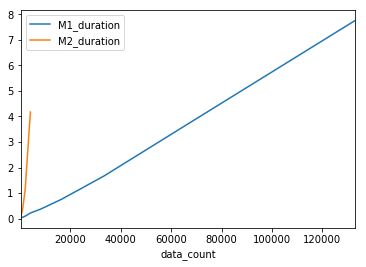

In [6]:
#benchmark_data.pop("M2_duration")

benchmark_df = pd.DataFrame(benchmark_data)

benchmark_df.plot(x=["data_count"], y=["M1_duration", "M2_duration"])

#benchmark_df.to_csv("../data/data_sensitivity.csv")